# Part 3: Exploratory Data Analysis

This notebook handles:
- Visualizing stock prices over time
- Analyzing price trends by sector
- Distribution analysis of returns


## 3.1 Setup


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10



✓ Libraries imported successfully!


## 3.2 Load Data


In [ ]:
%store -r prices_clean
%store -r returns_df
%store -r tech_stocks
%store -r finance_stocks
%store -r all_tickers

if 'prices_clean' not in locals():
    processed_dir = Path.cwd().parent / 'data' / 'processed'
    prices_clean = pd.read_csv(processed_dir / 'clean_prices.csv', index_col=0, parse_dates=True)
    returns_df = pd.read_csv(processed_dir / 'daily_returns.csv', index_col=0, parse_dates=True)
    tech_stocks = ['AAPL', 'MSFT', 'GOOGL']
    finance_stocks = ['JPM', 'BAC', 'GS']
    all_tickers = tech_stocks + finance_stocks
    print("✓ Data loaded from CSV files")
else:
    print("✓ Data loaded from previous notebook")

✓ Data loaded from previous notebook
✓ Prices shape: (1483, 6)
✓ Returns shape: (1482, 6)


## 3.3 Visualize Stock Prices by Sector


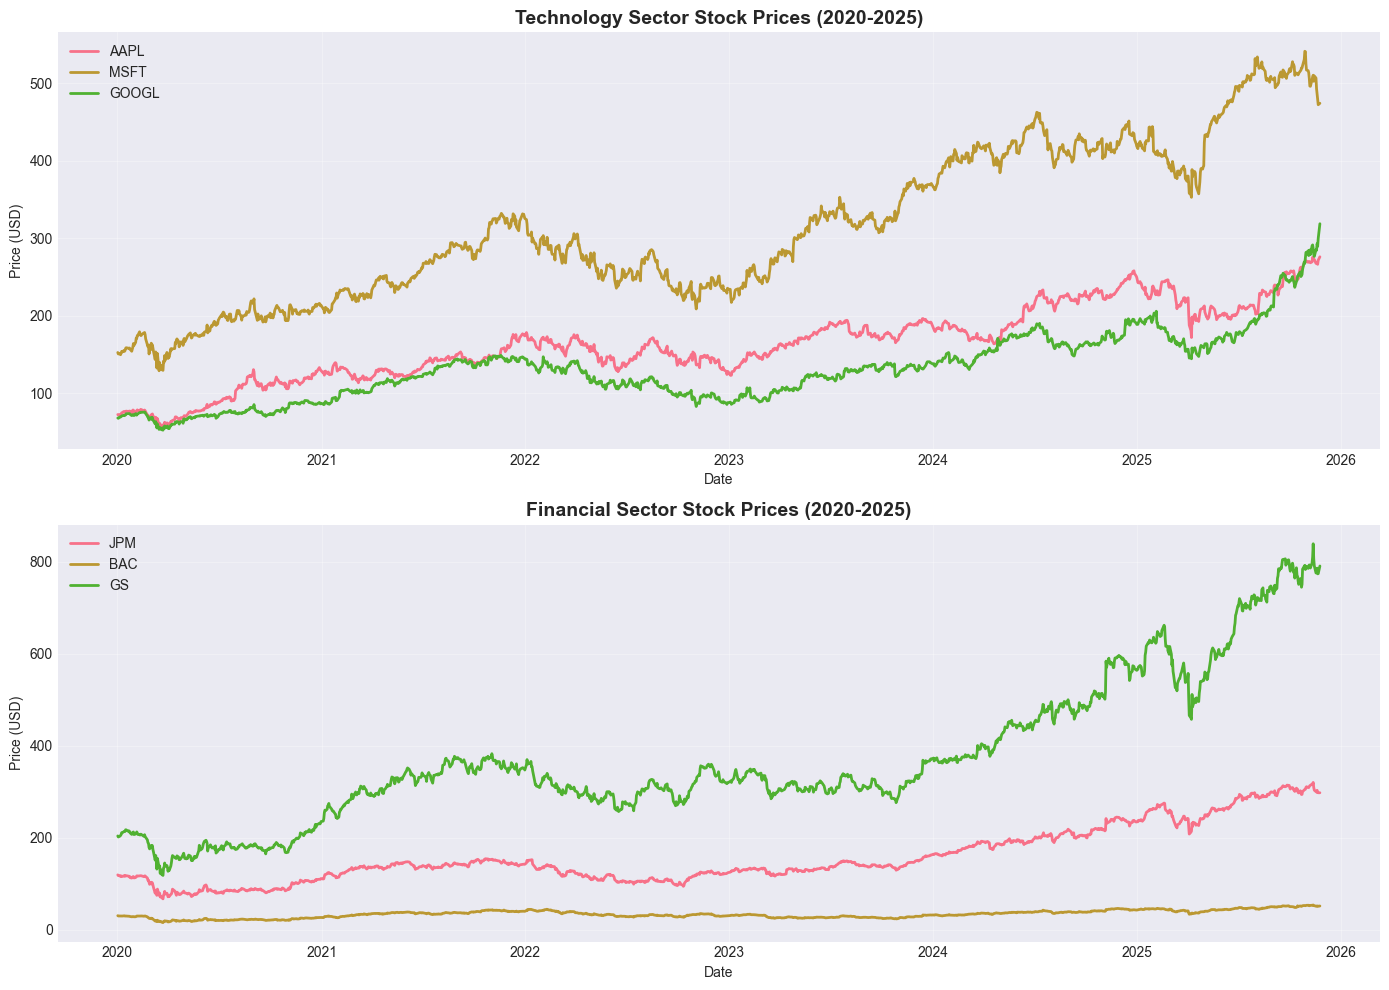

✓ Stock prices show clear trends and sector-specific patterns
✓ Technology stocks show stronger growth trends
✓ COVID-19 impact visible in March 2020


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for ticker in tech_stocks:
    axes[0].plot(prices_clean.index, prices_clean[ticker], label=ticker, linewidth=2)

axes[0].set_title('Technology Sector Stock Prices (2020-2025)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for ticker in finance_stocks:
    axes[1].plot(prices_clean.index, prices_clean[ticker], label=ticker, linewidth=2)

axes[1].set_title('Financial Sector Stock Prices (2020-2025)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.4 Normalized Price Comparison


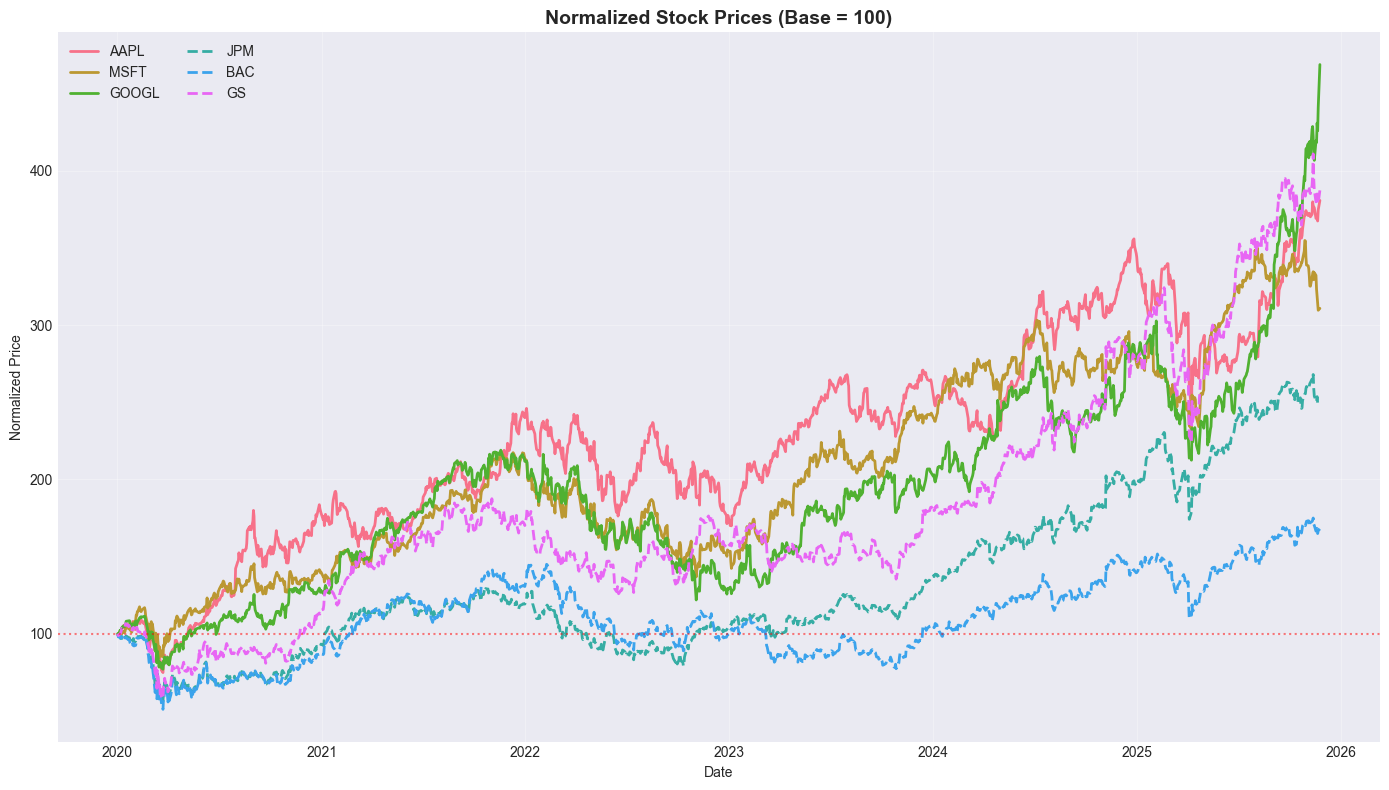


Performance since start date:
GOOGL  (Tech   ): +368.74%
GS     (Finance): +287.24%
AAPL   (Tech   ): +280.75%
MSFT   (Tech   ): +210.81%
JPM    (Finance): +149.22%
BAC    (Finance):  +67.95%


In [ ]:
normalized_prices = (prices_clean / prices_clean.iloc[0]) * 100

fig, ax = plt.subplots(figsize=(14, 8))

for ticker in all_tickers:
    linestyle = '-' if ticker in tech_stocks else '--'
    ax.plot(normalized_prices.index, normalized_prices[ticker], 
            label=ticker, linewidth=2, linestyle=linestyle)

ax.set_title('Normalized Stock Prices (Base = 100)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')
ax.legend(loc='best', ncol=2)
ax.grid(True, alpha=0.3)
ax.axhline(y=100, color='red', linestyle=':', alpha=0.5, label='Starting Point')

plt.tight_layout()
plt.show()

print("\nPerformance since start date:")
performance = ((prices_clean.iloc[-1] / prices_clean.iloc[0]) - 1) * 100
performance_sorted = performance.sort_values(ascending=False)
for ticker, perf in performance_sorted.items():
    sector = "Tech" if ticker in tech_stocks else "Finance"
    print(f"{ticker:6s} ({sector:7s}): {perf:+7.2f}%")


## 3.5 Distribution of Daily Returns


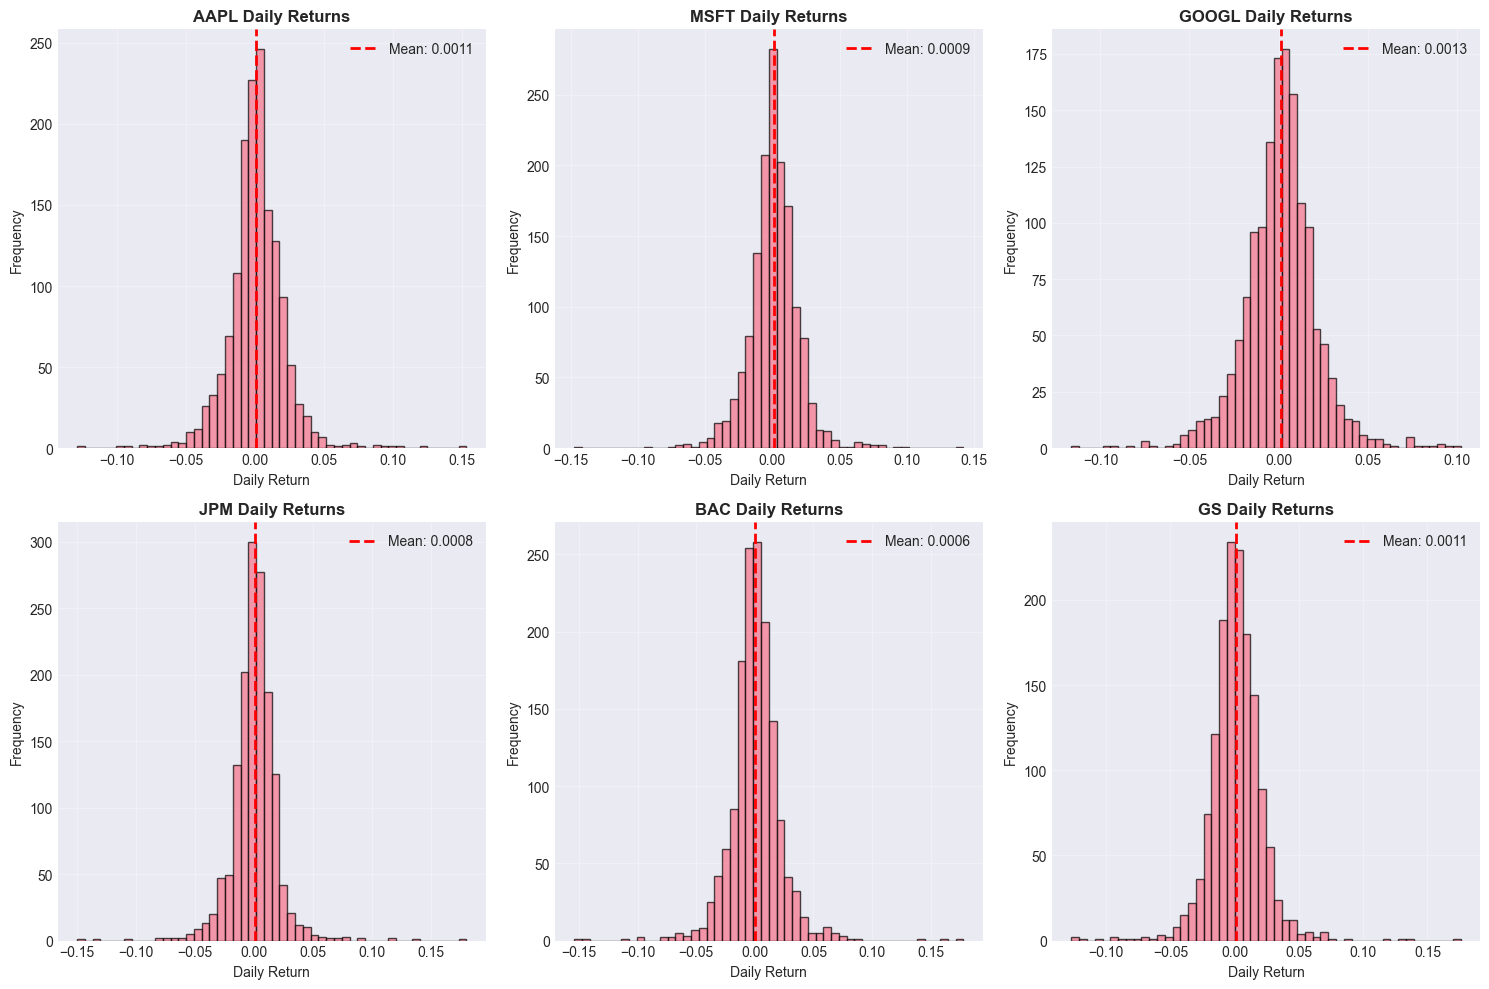

✓ Returns approximately follow normal distribution
✓ Some outliers visible during market stress periods


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, ticker in enumerate(all_tickers):
    axes[idx].hist(returns_df[ticker], bins=50, alpha=0.7, edgecolor='black')
    axes[idx].axvline(returns_df[ticker].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {returns_df[ticker].mean():.4f}')
    axes[idx].set_title(f'{ticker} Daily Returns', fontweight='bold')
    axes[idx].set_xlabel('Daily Return')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 3.6 Save Visualization


✓ Chart saved to /Users/mkgp3/WebstormProjects/Market Pulse Python Project/data/processed/stock_prices.png


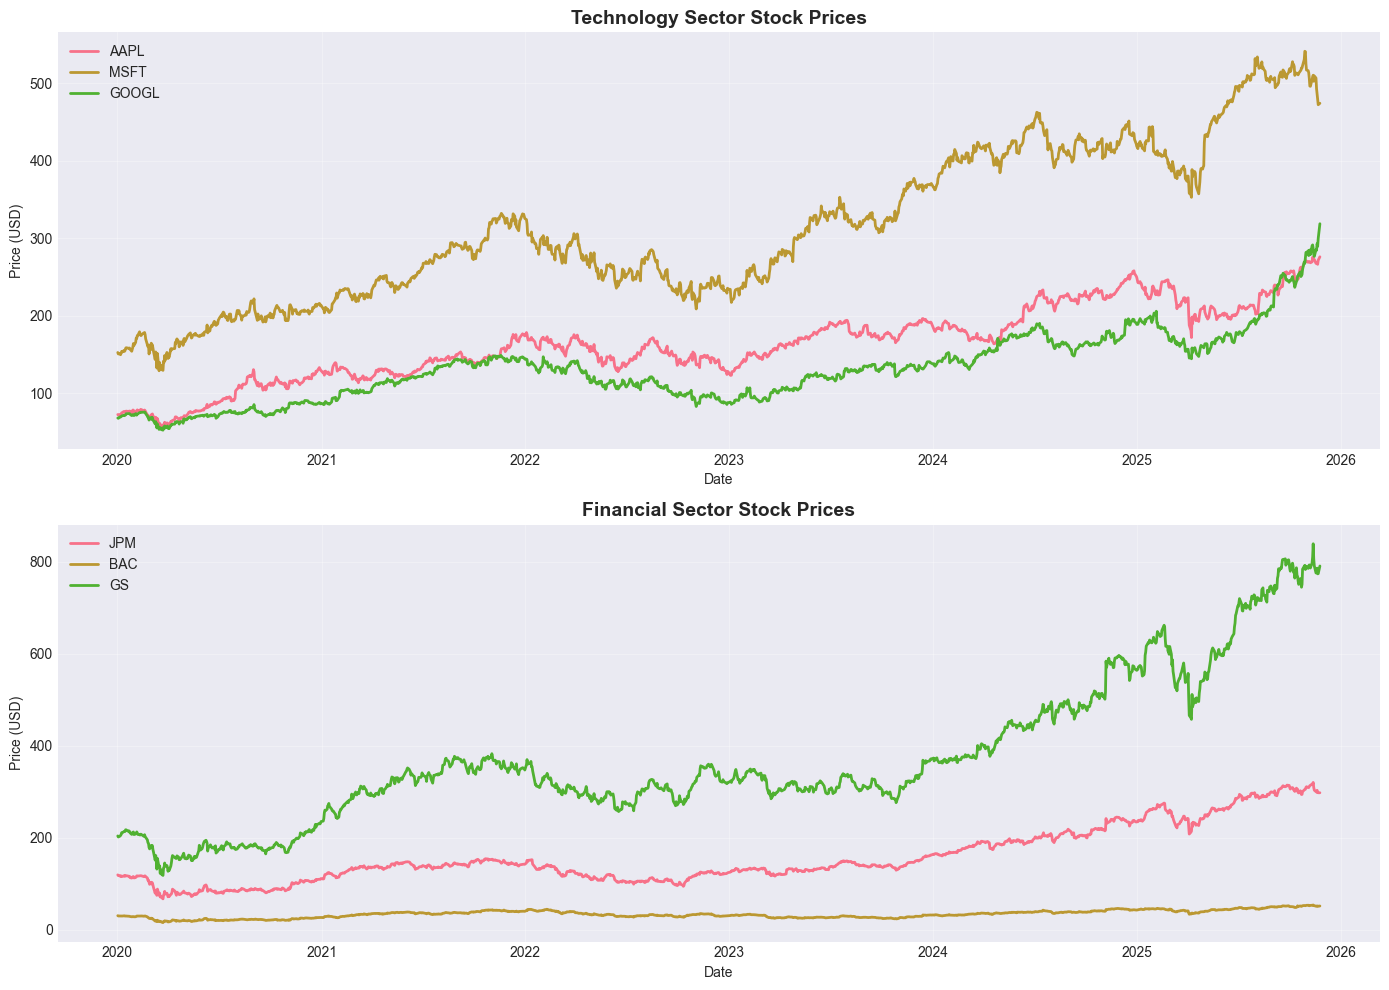

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for ticker in tech_stocks:
    axes[0].plot(prices_clean.index, prices_clean[ticker], label=ticker, linewidth=2)
axes[0].set_title('Technology Sector Stock Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for ticker in finance_stocks:
    axes[1].plot(prices_clean.index, prices_clean[ticker], label=ticker, linewidth=2)
axes[1].set_title('Financial Sector Stock Prices', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

output_dir = Path.cwd().parent / 'data' / 'processed'
output_path = output_dir / 'stock_prices.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
